<a href="https://colab.research.google.com/github/SoniyaJ20/Demand-Forecasting-and-Inventory-Optimization/blob/main/PROJECT(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Step 1: Load the Dataset
df = pd.read_csv('DATASET(1).csv')
print("--- Initial Data Load and Head ---")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\n--- DataFrame Info (Column types and Non-Null Counts) ---")
print(df.info())

#  Step 2: Data Cleaning/Preparation
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

--- Initial Data Load and Head ---
| Date       | Product Name   | Category    | Units Sold   | Price   | Revenue   | Discount   | Units Returned   | Location   | Platform   |
|:-----------|:---------------|:------------|:-------------|:--------|:----------|:-----------|:-----------------|:-----------|:-----------|
| 06-01-2020 | Whey Protein   | Protein     | 143          | 31.98   | 4573.14   | 0.03       | 2                | Canada     | Walmart    |
| 06-01-2020 | Vitamin C      | Vitamin     | 139          | 42.51   | 5908.89   | 0.04       | 0                | UK         | Amazon     |
| 06-01-2020 | Fish Oil       | Omega       | 161          | 12.91   | 2078.51   | 0.25       | 0                | Canada     | Amazon     |
| 06-01-2020 | Multivitamin   | Vitamin     | 140          | 16.07   | 2249.8    | 0.08       | 0                | Canada     | Walmart    |
| 06-01-2020 | Pre-Workout    | Performance | 157          | 35.47   | 5568.79   | 0.25       | 3                | Cana

In [3]:
# --- Step 3: Descriptive Statistics ---
print("\n--- Descriptive Statistics for Sales Data ---")
print(df[['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned']].describe().to_markdown(numalign="left", stralign="left"))



--- Descriptive Statistics for Sales Data ---
|       | Units Sold   | Price   | Revenue   | Discount   | Units Returned   |
|:------|:-------------|:--------|:----------|:-----------|:-----------------|
| count | 4384         | 4384    | 4384      | 4384       | 4384             |
| mean  | 150.2        | 34.7812 | 5226.57   | 0.124398   | 1.53148          |
| std   | 12.3961      | 14.1983 | 2192.49   | 0.0717917  | 1.25848          |
| min   | 103          | 10      | 1284      | 0          | 0                |
| 25%   | 142          | 22.5975 | 3349.37   | 0.06       | 1                |
| 50%   | 150          | 34.72   | 5173.14   | 0.12       | 1                |
| 75%   | 158          | 46.7125 | 7009.96   | 0.19       | 2                |
| max   | 194          | 59.97   | 10761.9   | 0.25       | 8                |


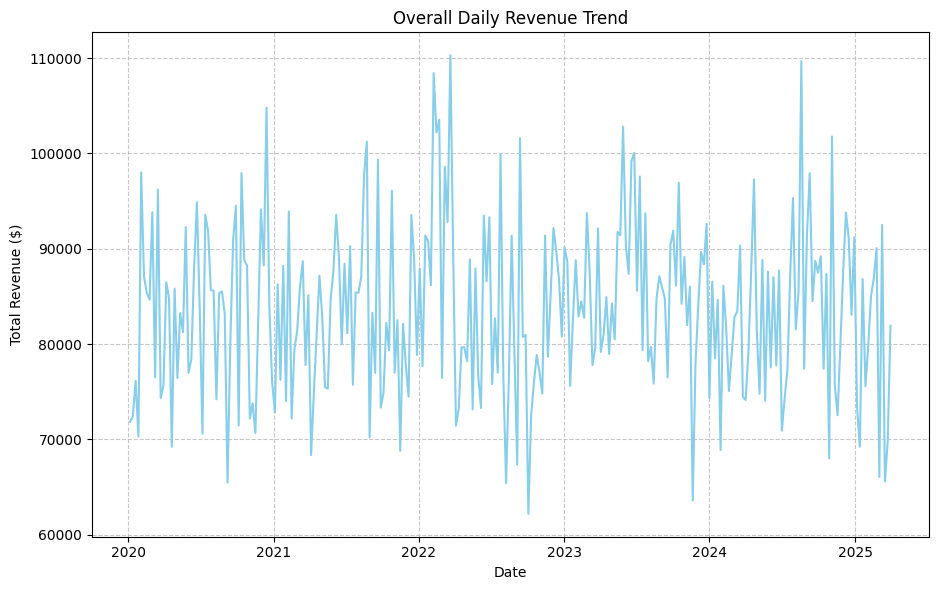

In [4]:
# --- Step 4: Overall Sales Trends Visualization ---
# Aggregate daily sales data
daily_sales = df.groupby('Date').agg(
    Total_Revenue=('Revenue', 'sum'),
    Total_Units_Sold=('Units Sold', 'sum')
).reset_index()
# Plotting overall sales trends
plt.figure(figsize=(18, 6))
# Plot Total Revenue over time
plt.subplot(1, 2, 1)
plt.plot(daily_sales['Date'], daily_sales['Total_Revenue'], color='skyblue')
plt.title('Overall Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

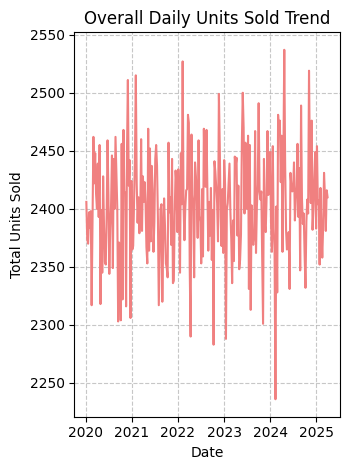

In [5]:
# Plot Total Units Sold over time
plt.subplot(1, 2, 2)
plt.plot(daily_sales['Date'], daily_sales['Total_Units_Sold'], color='lightcoral')
plt.title('Overall Daily Units Sold Trend')
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

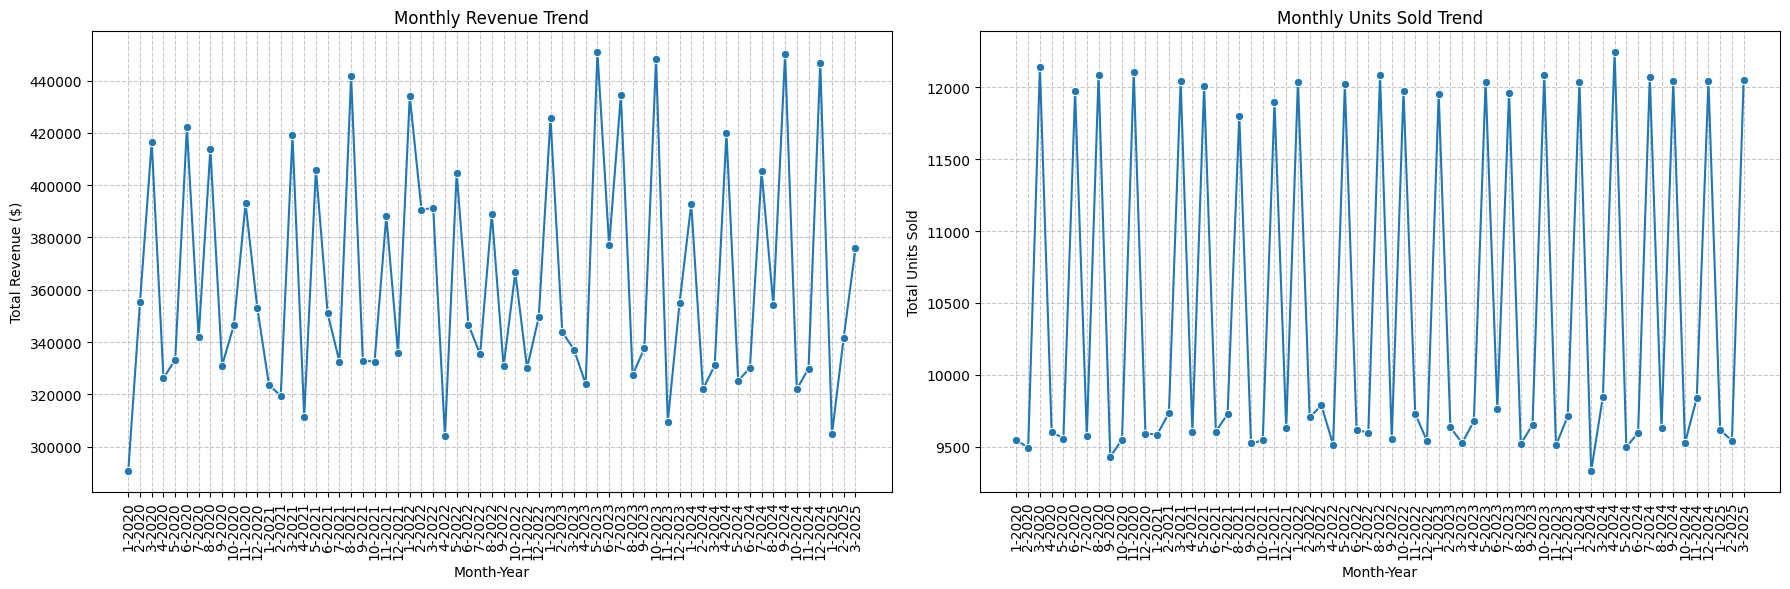

In [6]:
# --- Step 5: Seasonality Analysis (Monthly and Day of Week) ---
# Extract time components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek # Monday=0, Sunday=6
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)

# Aggregate sales by Month
monthly_sales = df.groupby(['Year', 'Month']).agg(
    Total_Revenue=('Revenue', 'sum'),
    Total_Units_Sold=('Units Sold', 'sum')
).reset_index()

# Sort by Year and Month for chronological plotting
monthly_sales = monthly_sales.sort_values(by=['Year', 'Month'])

# Plotting monthly sales trends
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=monthly_sales, x=monthly_sales['Month'].astype(str) + '-' + monthly_sales['Year'].astype(str), y='Total_Revenue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.lineplot(data=monthly_sales, x=monthly_sales['Month'].astype(str) + '-' + monthly_sales['Year'].astype(str), y='Total_Units_Sold', marker='o')
plt.title('Monthly Units Sold Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


/tmp/ipython-input-2228050910.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_of_week_sales, x='DayName', y='Avg_Revenue', palette='viridis')
/tmp/ipython-input-2228050910.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_of_week_sales, x='DayName', y='Avg_Units_Sold', palette='magma')


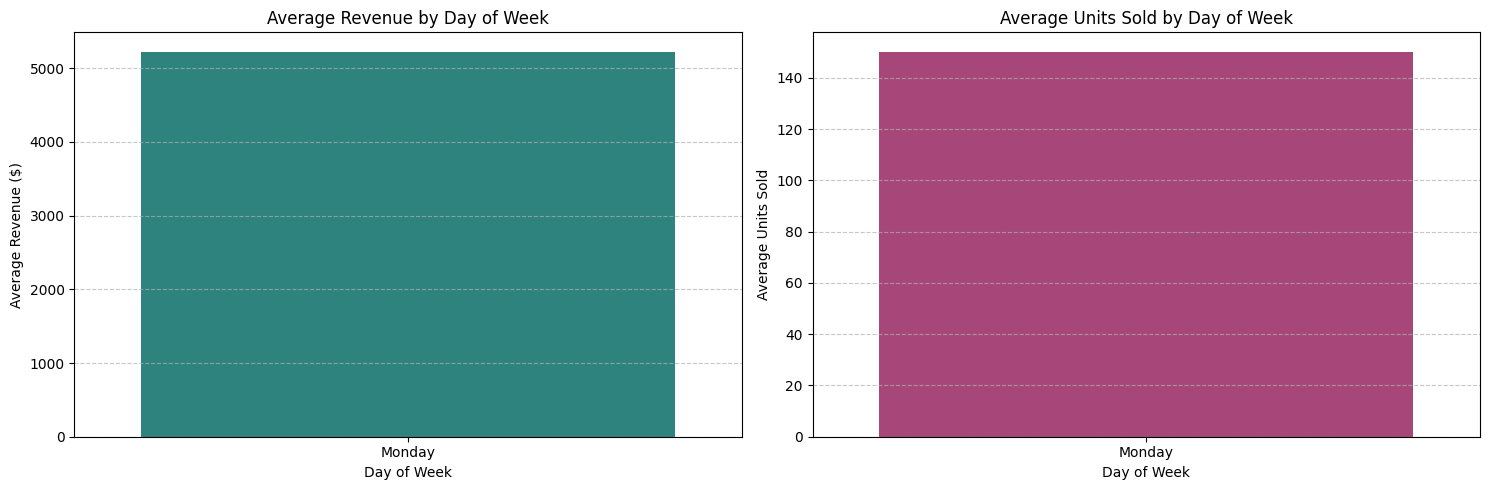

In [7]:
# Aggregate sales by Day of Week
daily_of_week_sales = df.groupby('DayOfWeek').agg(
    Avg_Revenue=('Revenue', 'mean'),
    Avg_Units_Sold=('Units Sold', 'mean')
).reset_index()

# Map DayOfWeek to actual names for better readability
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_of_week_sales['DayName'] = daily_of_week_sales['DayOfWeek'].map(lambda x: day_names[x])

# Plotting average sales by Day of Week
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=daily_of_week_sales, x='DayName', y='Avg_Revenue', palette='viridis')
plt.title('Average Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Revenue ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.barplot(data=daily_of_week_sales, x='DayName', y='Avg_Units_Sold', palette='magma')
plt.title('Average Units Sold by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Units Sold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [8]:
# --- Step 6: Product, Category, and Platform Analysis ---
# Top 10 Products by Revenue
top_products_revenue = df.groupby('Product Name')['Revenue'].sum().nlargest(10).reset_index()
print("\n--- Top 10 Products by Total Revenue ---")
print(top_products_revenue.to_markdown(index=False, numalign="left", stralign="left"))



--- Top 10 Products by Total Revenue ---
| Product Name      | Revenue     |
|:------------------|:------------|
| Biotin            | 1.4868e+06  |
| Zinc              | 1.48255e+06 |
| Pre-Workout       | 1.47718e+06 |
| BCAA              | 1.46482e+06 |
| Fish Oil          | 1.45107e+06 |
| Green Tea Extract | 1.4409e+06  |
| Collagen Peptides | 1.4333e+06  |
| Creatine          | 1.43252e+06 |
| Iron Supplement   | 1.43158e+06 |
| Whey Protein      | 1.42219e+06 |


In [9]:
# Top 10 Products by Units Sold
top_products_units = df.groupby('Product Name')['Units Sold'].sum().nlargest(10).reset_index()
print("\n--- Top 10 Products by Total Units Sold ---")
print(top_products_units.to_markdown(index=False, numalign="left", stralign="left"))



--- Top 10 Products by Total Units Sold ---
| Product Name    | Units Sold   |
|:----------------|:-------------|
| Biotin          | 41533        |
| Ashwagandha     | 41408        |
| Fish Oil        | 41325        |
| Pre-Workout     | 41287        |
| Magnesium       | 41270        |
| Whey Protein    | 41264        |
| Creatine        | 41236        |
| Zinc            | 41204        |
| Iron Supplement | 41194        |
| Multivitamin    | 41174        |


In [10]:
# Sales by Category
category_sales = df.groupby('Category').agg(
    Total_Revenue=('Revenue', 'sum'),
    Total_Units_Sold=('Units Sold', 'sum')
).reset_index().sort_values(by='Total_Revenue', ascending=False)
print("\n--- Sales by Category ---")
print(category_sales.to_markdown(index=False, numalign="left", stralign="left"))



--- Sales by Category ---
| Category    | Total_Revenue   | Total_Units_Sold   |
|:------------|:----------------|:-------------------|
| Vitamin     | 4.30022e+06     | 123434             |
| Mineral     | 4.27611e+06     | 123668             |
| Performance | 2.9097e+06      | 82523              |
| Protein     | 2.85549e+06     | 82120              |
| Amino Acid  | 1.46482e+06     | 41027              |
| Omega       | 1.45107e+06     | 41325              |
| Fat Burner  | 1.4409e+06      | 40743              |
| Hydration   | 1.41195e+06     | 41065              |
| Herbal      | 1.4057e+06      | 41408              |
| Sleep Aid   | 1.39732e+06     | 41165              |


In [11]:
# Sales by Platform
platform_sales = df.groupby('Platform').agg(
    Total_Revenue=('Revenue', 'sum'),
    Total_Units_Sold=('Units Sold', 'sum')
).reset_index().sort_values(by='Total_Revenue', ascending=False)
print("\n--- Sales by Platform ---")
print(platform_sales.to_markdown(index=False, numalign="left", stralign="left"))



--- Sales by Platform ---
| Platform   | Total_Revenue   | Total_Units_Sold   |
|:-----------|:----------------|:-------------------|
| iHerb      | 7.85526e+06     | 225427             |
| Amazon     | 7.66945e+06     | 220623             |
| Walmart    | 7.38857e+06     | 212428             |


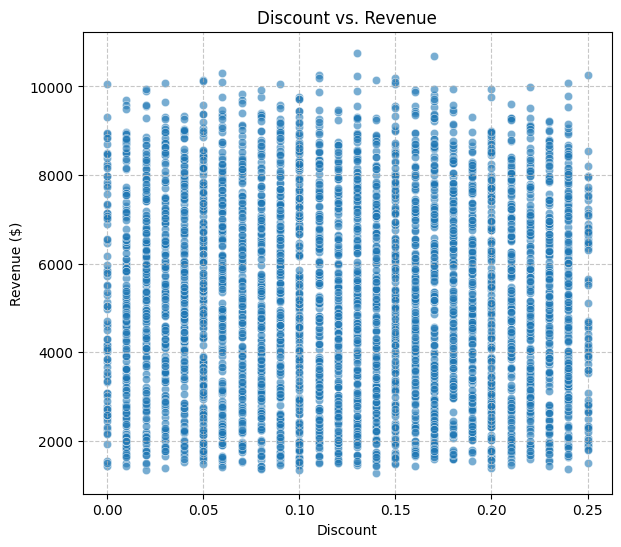

In [12]:
# Relationship between Discount and Revenue/Units Sold (using scatter plots)
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Discount', y='Revenue', alpha=0.6)
plt.title('Discount vs. Revenue')
plt.xlabel('Discount')
plt.ylabel('Revenue ($)')
plt.grid(True, linestyle='--', alpha=0.7)



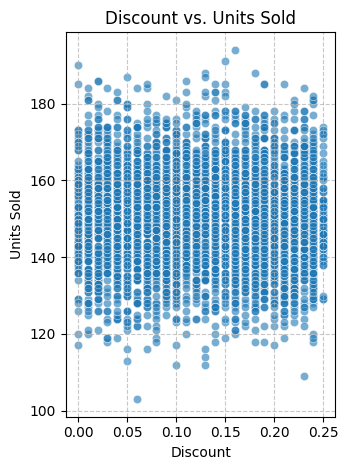

In [13]:
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Discount', y='Units Sold', alpha=0.6)
plt.title('Discount vs. Units Sold')
plt.xlabel('Discount')
plt.ylabel('Units Sold')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [14]:
# --- Step 7: Units Returned Analysis ---
# Calculate the return rate
df['Return Rate'] = (df['Units Returned'] / df['Units Sold']) * 100
df['Return Rate'] = df['Return Rate'].fillna(0) # Handle cases where Units Sold might be 0
# Overall average return rate
overall_avg_return_rate = df['Return Rate'].mean()
print(f"\n--- Overall Average Return Rate: {overall_avg_return_rate:.2f}% ---")



--- Overall Average Return Rate: 1.02% ---


In [15]:
# Return rate by product (top 5 with highest return rate)
product_return_rate = df.groupby('Product Name')['Return Rate'].mean().nlargest(5).reset_index()
print("\n--- Top 5 Products by Average Return Rate ---")
print(product_return_rate.to_markdown(index=False, numalign="left", stralign="left"))

# Return rate by category
category_return_rate = df.groupby('Category')['Return Rate'].mean().reset_index().sort_values(by='Return Rate', ascending=False)
print("\n--- Return Rate by Category ---")
print(category_return_rate.to_markdown(index=False, numalign="left", stralign="left"))


--- Top 5 Products by Average Return Rate ---
| Product Name       | Return Rate   |
|:-------------------|:--------------|
| Vitamin C          | 1.11916       |
| Electrolyte Powder | 1.07457       |
| Collagen Peptides  | 1.04926       |
| Magnesium          | 1.04231       |
| Pre-Workout        | 1.03637       |

--- Return Rate by Category ---
| Category    | Return Rate   |
|:------------|:--------------|
| Hydration   | 1.07457       |
| Vitamin     | 1.04749       |
| Amino Acid  | 1.03547       |
| Fat Burner  | 1.02291       |
| Performance | 1.02066       |
| Protein     | 1.02031       |
| Mineral     | 1.00792       |
| Omega       | 0.987023      |
| Sleep Aid   | 0.985988      |
| Herbal      | 0.9433        |


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07mfmbo5/6jj0bgqn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07mfmbo5/34xf4cv1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3124', 'data', 'file=/tmp/tmp07mfmbo5/6jj0bgqn.json', 'init=/tmp/tmp07mfmbo5/34xf4cv1.json', 'output', 'file=/tmp/tmp07mfmbo5/prophet_modela2up3ok5/prophet_model-20250811132519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:25:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:25:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


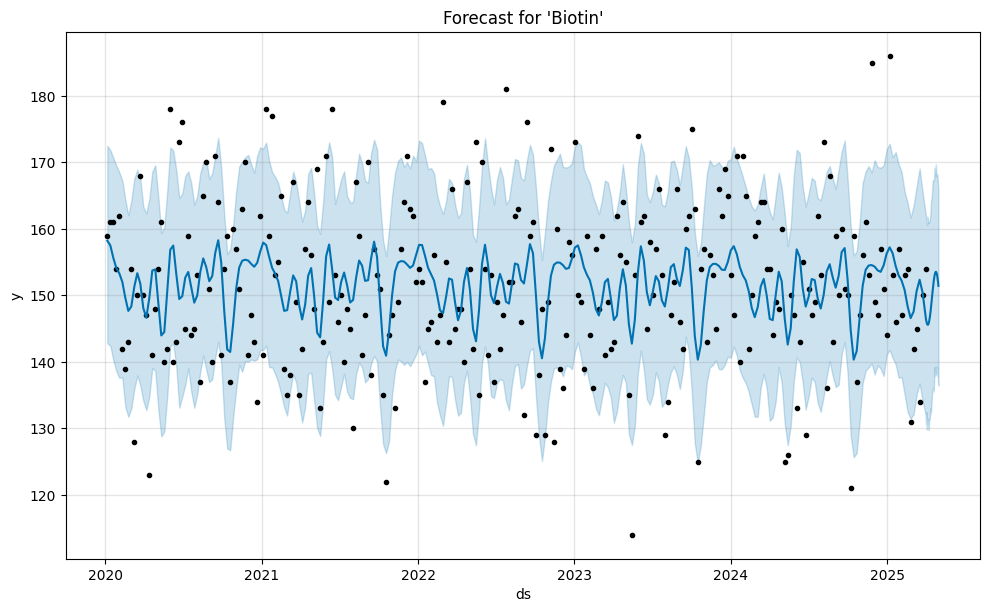

In [16]:
#demand forecasting
from prophet import Prophet

# Choose top product by total sales
top_product = df.groupby("Product Name")["Units Sold"].sum().idxmax()

# Filter data for this product
product_df = df[df["Product Name"] == top_product]

# Aggregate daily sales
daily = product_df.groupby('Date')['Units Sold'].sum().reset_index()
daily.columns = ['ds', 'y']  # Prophet needs these column names

# Fit Prophet model
model = Prophet()
model.fit(daily)

# Make future predictions (next 30 days)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title(f"Forecast for '{top_product}'")
plt.show()


In [17]:
#Inventory Optimization (Reorder Point & Safety Stock)
import numpy as np

# Daily demand stats
mean_demand = daily['y'].mean()
std_demand = daily['y'].std()
lead_time = 7
z = 1.65  # for 95% service level

# Reorder Point and Safety Stock
safety_stock = z * std_demand * np.sqrt(lead_time)
reorder_point = (mean_demand * lead_time) + safety_stock

print(f"Average Daily Demand: {mean_demand:.2f}")
print(f"Safety Stock: {safety_stock:.2f}")
print(f"Reorder Point: {reorder_point:.2f}")


Average Daily Demand: 151.58
Safety Stock: 55.25
Reorder Point: 1116.32


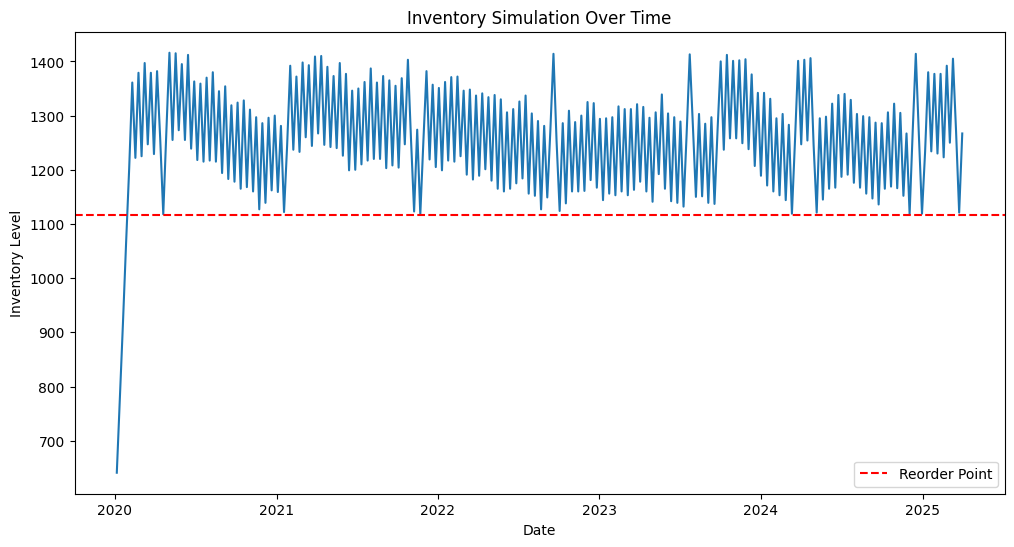

In [18]:
#Inventory Scenario Simulation
# Simulate inventory over time
starting_inventory = 500
inventory = starting_inventory
reorder_threshold = reorder_point
order_quantity = 300
lead_time_days = 7

inventory_log = []

for index, row in daily.iterrows():
    date = row['ds']
    demand = row['y']
    inventory -= demand
    if inventory < reorder_threshold:
        inventory += order_quantity  # simulate instant restock
    inventory_log.append((date, inventory))

# Plot
sim_df = pd.DataFrame(inventory_log, columns=['Date', 'Inventory'])
plt.figure(figsize=(12, 6))
plt.plot(sim_df['Date'], sim_df['Inventory'])
plt.title('Inventory Simulation Over Time')
plt.xlabel('Date')
plt.ylabel('Inventory Level')
plt.axhline(y=reorder_threshold, color='r', linestyle='--', label='Reorder Point')
plt.legend()
plt.show()


In [19]:
# Export core data for Power BI
df.to_csv("sales_data.csv", index=False)                     # Full cleaned dataset
daily_sales.to_csv("daily_sales_summary.csv", index=False)   # Aggregated daily revenue/units
monthly_sales.to_csv("monthly_sales_summary.csv", index=False)  # Monthly level
daily_of_week_sales.to_csv("weekday_sales.csv", index=False)    # Avg by weekday
top_products_revenue.to_csv("top_products_revenue.csv", index=False)
top_products_units.to_csv("top_products_units.csv", index=False)
category_sales.to_csv("category_sales.csv", index=False)
platform_sales.to_csv("platform_sales.csv", index=False)
product_return_rate.to_csv("product_return_rate.csv", index=False)
category_return_rate.to_csv("category_return_rate.csv", index=False)
forecast.to_csv("forecast_data.csv", index=False)
sim_df.to_csv("inventory_simulation.csv", index=False)


In [20]:
from google.colab import files

files.download("sales_data.csv")
files.download("forecast_data.csv")
files.download("inventory_simulation.csv")
files.download("category_sales.csv")
files.download("product_return_rate.csv")
files.download("top_products_revenue.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# -------------------------------
# Step 1: Load and Preprocess Data
# -------------------------------
df = pd.read_csv('DATASET(1).csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Aggregate daily demand per product
daily_demand = df.groupby(['Product Name', 'Date'])['Units Sold'].sum().reset_index()

# Compute average and std dev of daily demand
sku_stats = daily_demand.groupby('Product Name')['Units Sold'].agg(['mean', 'std']).reset_index()
sku_stats.columns = ['Product Name', 'avg_daily_demand', 'std_daily_demand']

# -------------------------------
# Step 2: Heuristic Optimization (Scipy)
# -------------------------------
def holding_cost(order_qty, demand_mean, holding_cost_per_unit):
    return 0.5 * order_qty * holding_cost_per_unit + abs(order_qty - demand_mean) * 0.1  # penalty for mismatch

optimized_policy = []

for _, row in sku_stats.iterrows():
    demand_mean = row['avg_daily_demand']
    holding_cost_per_unit = 0.5  # assumed fixed

    res = minimize(holding_cost, x0=[demand_mean], args=(demand_mean, holding_cost_per_unit),
                   bounds=[(0, 1000)], method='L-BFGS-B')

    reorder_point = demand_mean * 7 + 1.65 * row['std_daily_demand'] * np.sqrt(7)  # 7-day lead time, 95% service level
    optimized_policy.append({
        'Product Name': row['Product Name'],
        'Optimal Order Qty (scipy)': round(res.x[0], 2),
        'Reorder Point (heuristic)': round(reorder_point, 2)
    })

optimized_df = pd.DataFrame(optimized_policy)

# -------------------------------
# Step 3: ML-Based Inventory Estimation (scikit-learn)
# -------------------------------
df_ml = df.copy()
df_ml['Day'] = df_ml['Date'].dt.dayofweek

# One-hot encode categorical features
df_ml = pd.get_dummies(df_ml, columns=['Platform', 'Category', 'Location'], drop_first=True)

# Features and Target
features = ['Price', 'Discount', 'Day'] + [col for col in df_ml.columns if 'Platform_' in col or 'Category_' in col or 'Location_' in col]
X = df_ml[features]
y = df_ml['Units Sold']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)
predicted_demand = np.mean(y_pred)
std_predicted = np.std(y_pred)

# Global ML-based reorder point
ml_reorder_point = predicted_demand * 7 + 1.65 * std_predicted * np.sqrt(7)
print("ML-Predicted Reorder Point (global estimate):", round(ml_reorder_point, 2))

# -------------------------------
# Step 4: Merge Results and Display
# -------------------------------
final_inventory_plan = optimized_df.copy()
final_inventory_plan['ML Est. Reorder Point'] = round(ml_reorder_point, 2)

# Print the results
print("\nFinal Inventory Optimization Plan:")
print(final_inventory_plan)

# -------------------------------
# Optional: Export Results
# -------------------------------
# Save to CSV or Excel
final_inventory_plan.to_csv("final_inventory_plan.csv", index=False)
# final_inventory_plan.to_excel("final_inventory_plan.xlsx", index=False)


ML-Predicted Reorder Point (global estimate): 1056.34

Final Inventory Optimization Plan:
          Product Name  Optimal Order Qty (scipy)  Reorder Point (heuristic)  \
0          Ashwagandha                        0.0                    1114.05   
1                 BCAA                        0.0                    1099.03   
2               Biotin                        0.0                    1116.32   
3    Collagen Peptides                        0.0                    1096.21   
4             Creatine                        0.0                    1107.55   
5   Electrolyte Powder                        0.0                    1100.19   
6             Fish Oil                        0.0                    1112.02   
7    Green Tea Extract                        0.0                    1094.87   
8      Iron Supplement                        0.0                    1109.01   
9            Magnesium                        0.0                    1109.64   
10           Melatonin        

DEBUG:cmdstanpy:input tempfile: /tmp/tmp07mfmbo5/l8nh0cln.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07mfmbo5/llxinvkw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27398', 'data', 'file=/tmp/tmp07mfmbo5/l8nh0cln.json', 'init=/tmp/tmp07mfmbo5/llxinvkw.json', 'output', 'file=/tmp/tmp07mfmbo5/prophet_modelm3a2841z/prophet_model-20250811132527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:25:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:25:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Starting Advanced Time Series Modeling for Sales Forecasting.
Attempting to load data from DATASET(1).csv...
Data loaded and processed successfully from DATASET(1).csv. Shape: (4384, 10)

--- Modeling for Product: Whey Protein ---

--- Prophet Model ---
  Training Prophet model...
  Prophet forecast generated.
          ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2020-01-06  144.198505  128.338234  157.253483   144.198505   144.198505   
1 2020-01-13  144.218475  131.264227  161.546414   144.218475   144.218475   
2 2020-01-20  144.238445  138.093681  167.751479   144.238445   144.238445   
3 2020-01-27  144.258414  142.214723  171.464814   144.258414   144.258414   
4 2020-02-03  144.278384  139.407824  167.961579   144.278384   144.278384   

   additive_terms  additive_terms_lower  additive_terms_upper   weekly  \
0       -1.416263             -1.416263             -1.416263  3.77096   
1        2.880329              2.880329              2.880329  3.77096 

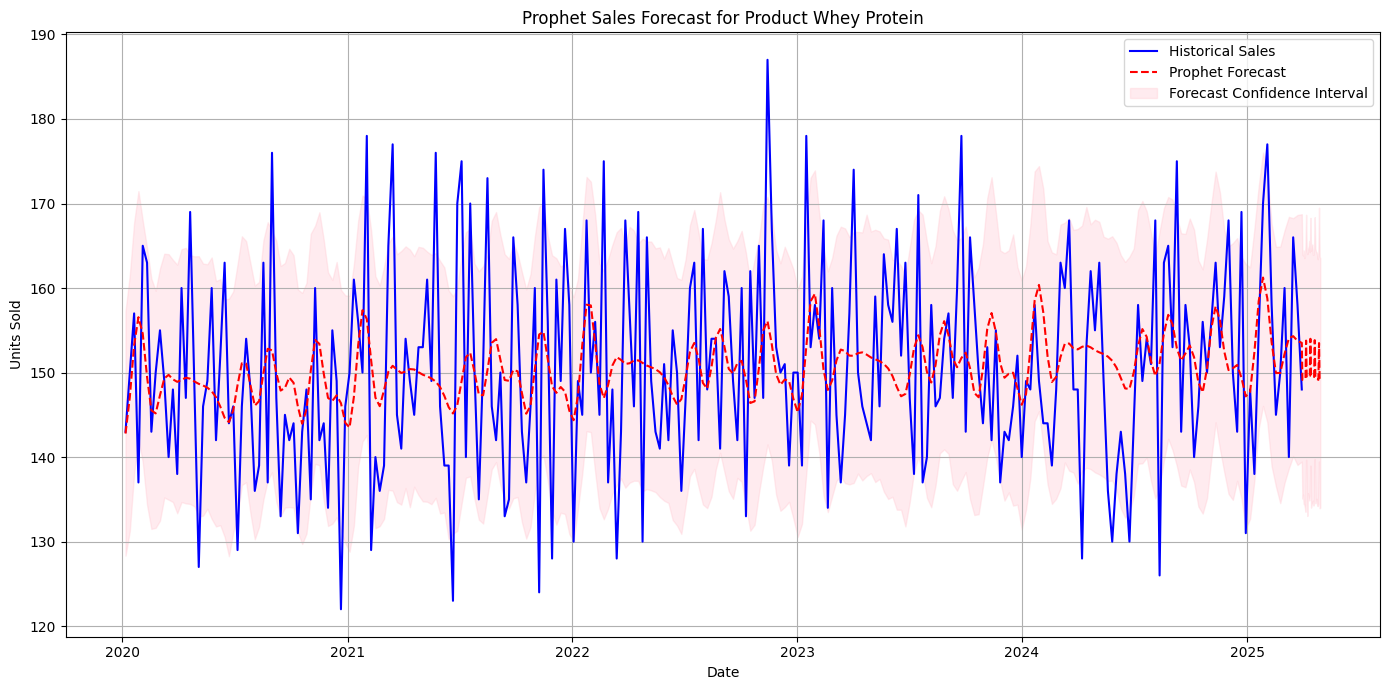


--- ARIMA Model ---
  Training ARIMA model...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


  ARIMA((5, 1, 0)) model fitted.
  ARIMA forecast generated.
          ds        yhat
0 2025-04-01  155.614426
1 2025-04-02  153.415390
2 2025-04-03  151.790923
3 2025-04-04  157.096641
4 2025-04-05  153.972201


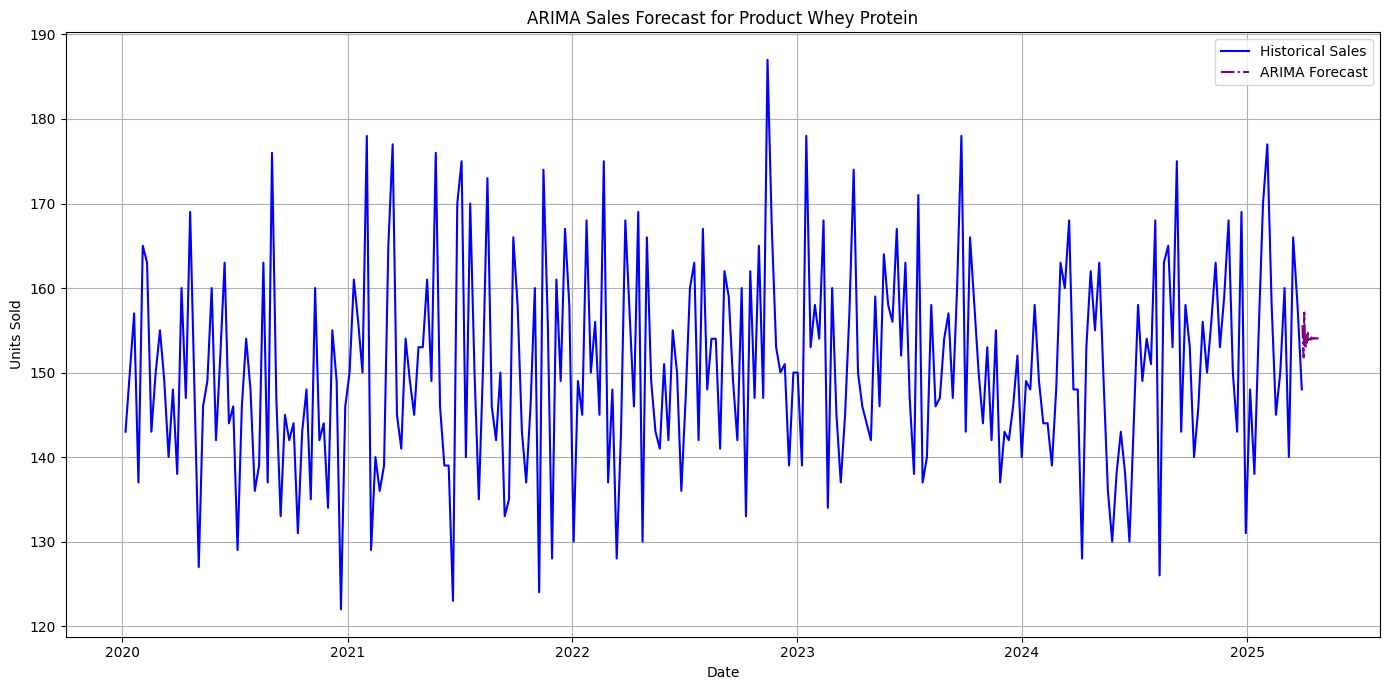


Advanced Time Series Modeling completed.


In [22]:
#modeling
import pandas as pd
import numpy as np
import os
from prophet import Prophet # For Prophet
from statsmodels.tsa.arima.model import ARIMA # For ARIMA
import lightgbm as lgb # For LightGBM
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
# Path to your dataset file
DATA_FILE_PATH = 'DATASET(1).csv'
FORECAST_HORIZON = 30 # Number of days to forecast into the future
TRAIN_TEST_SPLIT_RATIO = 0.8 # Ratio for splitting data into training and testing sets

# --- Data Collection (adapted for your CSV columns) ---
def load_sales_data_from_csv(file_path):
    """
    Attempts to load e-commerce sales data from a specified CSV file.
    Assumes original columns 'Date', 'Units Sold', and 'Product Name'.
    Maps them to 'Date', 'Sales', and 'Product_ID' respectively.
    Returns a pandas DataFrame if successful, None otherwise.
    """
    df = None
    if os.path.exists(file_path):
        try:
            print(f"Attempting to load data from {file_path}...")
            df = pd.read_csv(file_path)

            # Define expected original columns in your CSV
            original_date_col = 'Date'
            original_sales_col = 'Units Sold'
            original_product_id_col = 'Product Name'

            # Define the target column names for the script
            target_date_col = 'Date'
            target_sales_col = 'Sales'
            target_product_id_col = 'Product_ID'

            # Check if all required original columns are present
            if all(col in df.columns for col in [original_date_col, original_sales_col, original_product_id_col]):
                # Rename columns to match the script's expectations
                df.rename(columns={
                    original_date_col: target_date_col,
                    original_sales_col: target_sales_col,
                    original_product_id_col: target_product_id_col
                }, inplace=True)

                # Convert to correct data types
                df[target_date_col] = pd.to_datetime(df[target_date_col], format='%d-%m-%Y', errors='coerce') # Handle different date formats
                df[target_sales_col] = pd.to_numeric(df[target_sales_col], errors='coerce')
                df[target_product_id_col] = df[target_product_id_col].astype(str)

                # Drop rows where 'Date' or 'Sales' became NaN after coercion
                df.dropna(subset=[target_date_col, target_sales_col], inplace=True)
                df[target_sales_col] = df[target_sales_col].astype(int) # Convert to integer after dropping NaNs

                # Sort by Date for time series consistency
                df.sort_values(by=target_date_col, inplace=True)

                print(f"Data loaded and processed successfully from {file_path}. Shape: {df.shape}")
            else:
                missing_cols = []
                if original_date_col not in df.columns: missing_cols.append(original_date_col)
                if original_sales_col not in df.columns: missing_cols.append(original_sales_col)
                if original_product_id_col not in df.columns: missing_cols.append(original_product_id_col)
                print(f"Error: Original required columns {missing_cols} not found in {file_path}. Please ensure your CSV has '{original_date_col}', '{original_sales_col}', and '{original_product_id_col}'.")
                df = None
        except Exception as e:
            print(f"Error loading or processing CSV from {file_path}: {e}")
            df = None
    else:
        print(f"Error: File not found at {file_path}. Please ensure the CSV file is in the correct directory.")
        df = None
    return df

# --- Time Series Modeling Functions ---

# --- Model 1: Prophet ---
def train_and_forecast_prophet(df_product, forecast_horizon):
    """
    Trains a Prophet model and generates a forecast.
    Prophet is robust to missing data and shifts in trends.
    It automatically detects seasonality (yearly, weekly, daily) and holidays.
    """
    print("  Training Prophet model...")
    # Prophet requires 'ds' (datestamp) and 'y' (value) columns
    prophet_df = df_product[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})

    # Initialize and fit Prophet model
    m = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False, # Often too fine-grained unless very clear daily patterns
        changepoint_prior_scale=0.05 # Adjusts trend flexibility
    )

    # If promotion data is available (e.g., from your CSV), add it as an external regressor.
    # For your current CSV, there isn't an 'Is_Promotion' column.
    # If you add one in the future, uncomment and use this.
    # if 'Is_Promotion' in df_product.columns:
    #     prophet_df['Is_Promotion'] = df_product['Is_Promotion']
    #     m.add_regressor('Is_Promotion')
    #     print("  Added 'Is_Promotion' as a regressor for Prophet.")

    m.fit(prophet_df)

    # Create future dataframe for forecasting
    future = m.make_future_dataframe(periods=forecast_horizon)

    # If 'Is_Promotion' was a regressor, we would need to provide future values for it.
    # Since it's not in your current CSV, we don't need to worry about it here.
    # If you later add an 'Is_Promotion' column to your data and use it,
    # you'd need to define future 'Is_Promotion' values here.

    forecast = m.predict(future)
    print("  Prophet forecast generated.")
    return forecast, m

# --- Model 2: ARIMA ---
def train_and_forecast_arima(df_product, forecast_horizon):
    """
    Trains an ARIMA (AutoRegressive Integrated Moving Average) model and generates a forecast.
    ARIMA models analyze past values to predict future ones, accounting for trends (I for Integrated)
    and short-term dependencies (AR, MA).
    It requires the data to be stationary (mean, variance, autocorrelation constant over time).
    Often, differencing (the 'I' part) helps achieve stationarity.
    """
    print("  Training ARIMA model...")
    # ARIMA models typically work on a single time series, usually at a fixed frequency.
    # We will use the 'Sales' data.
    series = df_product.set_index('Date')['Sales']

    # Determine ARIMA order (p,d,q) - This is a crucial step and often requires
    # ACF/PACF plots or auto_arima functions (e.g., from pmdarima library).
    # For demonstration, we'll use a common, fixed order (e.g., 5,1,0 for AR(5) and 1st differencing).
    # d=1 (first-order differencing) is common to handle trends.
    arima_order = (5, 1, 0) # (p, d, q)

    try:
        model = ARIMA(series, order=arima_order)
        model_fit = model.fit()
        print(f"  ARIMA({arima_order}) model fitted.")

        # Generate forecast
        # `end` parameter for `predict` is based on index position.
        # We need to forecast `forecast_horizon` steps beyond the end of the series.
        start_index = len(series)
        end_index = len(series) + forecast_horizon - 1
        forecast = model_fit.predict(start=start_index, end=end_index, dynamic=False)
        forecast_dates = pd.date_range(start=series.index[-1] + pd.Timedelta(days=1),
                                       periods=forecast_horizon, freq='D')
        forecast_df = pd.DataFrame({'ds': forecast_dates, 'yhat': forecast.values})
        print("  ARIMA forecast generated.")
        return forecast_df
    except Exception as e:
        print(f"  Error training or forecasting with ARIMA: {e}")
        return pd.DataFrame() # Return empty DataFrame on error






# --- Main Execution Flow for Time Series Modeling ---
if __name__ == "__main__":
    print("Starting Advanced Time Series Modeling for Sales Forecasting.")

    # 1. Load Data
    df = load_sales_data_from_csv(DATA_FILE_PATH)

    if df is None or df.empty:
        print("No data available for modeling. Exiting.")
    else:
        # Ensure 'Product_ID' is treated as categorical for iteration
        df['Product_ID'] = df['Product_ID'].astype('category')

        # Get unique products - for demonstration, we'll pick the first one
        product_ids = df['Product_ID'].unique()
        if len(product_ids) == 0:
            print("No products found in the data. Exiting.")
        else:
            # For demonstration, let's focus on the first product for detailed modeling
            selected_product_id = product_ids[0]
            print(f"\n--- Modeling for Product: {selected_product_id} ---")
            df_product = df[df['Product_ID'] == selected_product_id].copy()
            df_product.sort_values('Date', inplace=True)

            # Ensure data is sufficient for time series modeling
            # A general rule of thumb for Prophet/ARIMA is usually 2+ years of daily data for good seasonality detection.
            # LSTM/LightGBM also benefit from more data.
            min_data_points = 100 # Adjusted minimum for better model training
            if len(df_product) < min_data_points:
                print(f"Not enough data for product {selected_product_id} ({len(df_product)} entries). Skipping modeling. Need at least {min_data_points} data points.")
            else:
                # --- Run Prophet ---
                print("\n--- Prophet Model ---")
                prophet_forecast, prophet_model = train_and_forecast_prophet(df_product, FORECAST_HORIZON)
                print(prophet_forecast.head())

                # Plot Prophet forecast
                fig_prophet, ax_prophet = plt.subplots(figsize=(14, 7))
                ax_prophet.plot(df_product['Date'], df_product['Sales'], label='Historical Sales', color='blue')
                ax_prophet.plot(prophet_forecast['ds'], prophet_forecast['yhat'], label='Prophet Forecast', color='red', linestyle='--')
                ax_prophet.fill_between(prophet_forecast['ds'], prophet_forecast['yhat_lower'], prophet_forecast['yhat_upper'],
                                        color='pink', alpha=0.3, label='Forecast Confidence Interval')
                ax_prophet.set_title(f'Prophet Sales Forecast for Product {selected_product_id}')
                ax_prophet.set_xlabel('Date')
                ax_prophet.set_ylabel('Units Sold')
                ax_prophet.legend()
                plt.grid(True)
                plt.tight_layout()
                plt.show()

                # --- Run ARIMA ---
                print("\n--- ARIMA Model ---")
                arima_forecast = train_and_forecast_arima(df_product, FORECAST_HORIZON)
                if not arima_forecast.empty:
                    print(arima_forecast.head())
                    # Plot ARIMA forecast
                    fig_arima, ax_arima = plt.subplots(figsize=(14, 7))
                    ax_arima.plot(df_product['Date'], df_product['Sales'], label='Historical Sales', color='blue')
                    ax_arima.plot(arima_forecast['ds'], arima_forecast['yhat'], label='ARIMA Forecast', color='purple', linestyle='-.')
                    ax_arima.set_title(f'ARIMA Sales Forecast for Product {selected_product_id}')
                    ax_arima.set_xlabel('Date')
                    ax_arima.set_ylabel('Units Sold')
                    ax_arima.legend()
                    plt.grid(True)
                    plt.tight_layout()
                    plt.show()





    print("\nAdvanced Time Series Modeling completed.")
